In [7]:
#inporting dependencies

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [8]:
# using pandas to read the database

data = pd.read_csv('mnist_train.csv')
data = pd.read_csv('mnist_test.csv')

In [35]:
# viewing the coloumn heads
data.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# extracting data from the data set ond viewing them
a = data.iloc[3,1:].values

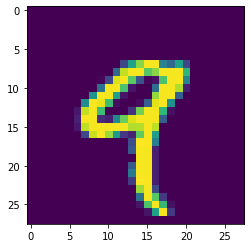

In [11]:
#reshaping the extracted data into a reasonable size
a = a.reshape(28,28).astype('uint8')
plt.imshow(a)

In [12]:
#preparing the data
#seperating data and labels values
df_x = data.iloc[:,1:]
df_y = data.iloc[:,0]

In [13]:
#creating test and train size/batches
x_train, x_test, y_test, y_train = train_test_split(df_x , df_y, test_size = 0.2, random_state = 4) 

In [15]:
#checking data
y_train.head()

41382    0
20883    1
13621    6
41823    1
33839    3
Name: 5, dtype: int64

In [17]:
#call rf classifier
rf = RandomForestClassifier(n_estimators = 100)

In [43]:
#fitting model
rf.fit(x_test, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
#predicting on the test data
pred = rf.predict(x_test)

In [37]:
pred

array([0, 1, 6, ..., 1, 8, 6], dtype=int64)

In [50]:
#check prediction accuracy
a = y_train.values

#caculate number of correctly predicted values
count = 0
for i in range(len(pred)):
    if pred[i] == a[i]:
        count = count+1

In [45]:
count

1143

In [41]:
#total values that the prediction code was run on
len(pred)

12000